In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_trees_all = pd.read_csv('data/avianHabitat.csv')
df_trees_all.head()

,Site,Observer,Subpoint,VOR,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt,PB
0,BunkerHill27,RA,1,6.0,3,5.2,0,0.0,4,2.9,0,0.0,4,3.0,0,0.0,0
1,BunkerHill27,RA,2,4.5,2,3.1,3,4.7,3,4.1,0,0.0,3,3.5,2,1.0,0
2,BunkerHill27,RA,3,2.0,4,5.5,1,5.8,3,3.9,0,0.0,3,7.5,0,0.0,0
3,BunkerHill27,RA,4,2.5,3,6.2,0,0.0,3,4.0,0,0.0,4,5.0,0,0.0,0
4,BunkerHill27,RA,5,4.0,4,5.4,0,0.0,3,3.5,0,0.0,4,3.7,0,0.0,0


In [2]:
df_trees = df_trees_all[['PW','EHt']]
print(df_trees)
df_trees_filt = df_trees[(df_trees['PW'] != 0) & (df_trees['EHt'] != 0)]
print(df_trees_filt)

      PW  EHt
0      0  2.9
1      3  4.1
2      1  3.9
3      0  4.0
4      0  3.5
...   ..  ...
1065   3  2.2
1066   2  1.7
1067   5  1.5
1068   5  3.1
1069   3  1.4

[1070 rows x 2 columns]
      PW  EHt
1      3  4.1
2      1  3.9
6      2  2.6
7      1  4.3
8      1  5.2
...   ..  ...
1065   3  2.2
1066   2  1.7
1067   5  1.5
1068   5  3.1
1069   3  1.4

[522 rows x 2 columns]


In [3]:
tr_min = df_trees_filt['EHt'].min()
tr_max = df_trees_filt['EHt'].max()
print('min:', tr_min)
print('max:', tr_max)
print('scope:', tr_max - tr_min)
print('mean:', df_trees_filt['EHt'].mean())
print('median:', df_trees_filt['EHt'].median())
print('mode:', df_trees_filt['EHt'].mode()[0])
print('var:', df_trees_filt['EHt'].var())
print('std:', df_trees_filt['EHt'].std())
quart1 = df_trees_filt['EHt'].quantile(0.25)
quart3 = df_trees_filt['EHt'].quantile(0.75)
print('quartile 1:', quart1)
print('quartile 3:', quart3)
print('quartile scope:', quart3 - quart1)
print('skew:', df_trees_filt['EHt'].skew())
print('kurt:', df_trees_filt['EHt'].kurt())

min: 0.1
max: 5.3
scope: 5.2
mean: 1.2149425287356324
median: 1.0
mode: 0.5
var: 0.7369739890131687
std: 0.8584718918014548
quartile 1: 0.6
quartile 3: 1.5
quartile scope: 0.9
skew: 1.7101594887482066
kurt: 3.8738115404272664


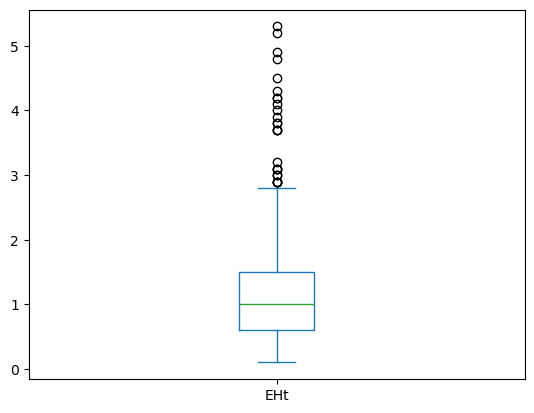

In [4]:
# Задание 3.
df_trees_filt['EHt'].plot(kind='box')
plt.show()

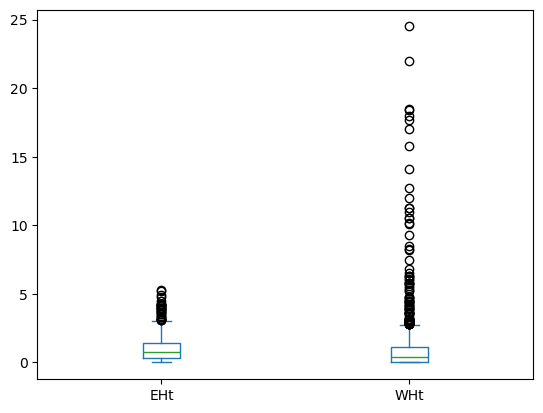

In [5]:
# Задание 4.
df_trees_all[['EHt','WHt']].plot(kind='box')
plt.show()

In [6]:
# Задание 5.
sorted_tr = df_trees_filt['EHt'].sort_values(ascending=True)
len_tr = len(df_trees_filt['EHt'])
tr_min = df_trees_filt['EHt'].min()
tr_max = df_trees_filt['EHt'].max()
print(sorted_tr)
print('len:', len_tr)
print('min:', tr_min)
print('max:', tr_max)

1040    0.1
759     0.2
751     0.2
1054    0.2
1004    0.2
       ... 
11      4.5
81      4.8
517     4.9
8       5.2
130     5.3
Name: EHt, Length: 522, dtype: float64
len: 522
min: 0.1
max: 5.3


In [7]:
def func_EHt(x):
    if x < tr_min: 
        return 0.
    elif x >= tr_max: 
        return 1.
    else: 
        return ( len(sorted_tr[sorted_tr < x]) / float(len_tr) )

dots = 100
grid = np.linspace(tr_min, tr_max, dots)

vectorized_func_EHt = np.vectorize(func_EHt)
grid_func = vectorized_func_EHt(grid)

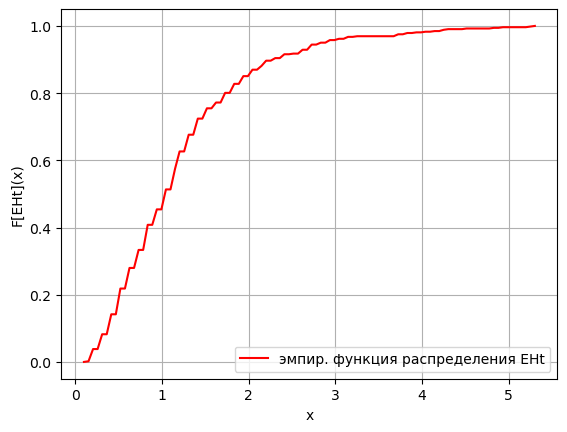

In [8]:
plt.plot(grid, grid_func, label='Эмпирическая функция распределения EHt', color='red')  
# f_n(x) = 1 / n * sum (i=1,n, I(x_i < x))
plt.xlabel('x')
plt.ylabel('F[EHt](x)')
plt.legend()
plt.grid(True)
plt.show()

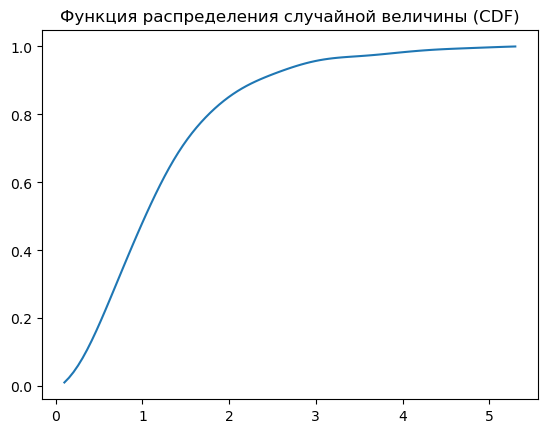

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Пример данных
data =  df_trees_filt['EHt']

# Строим функцию плотности распределения
density = stats.gaussian_kde(data)
x = np.linspace(min(data), max(data), 100)

# Интегрируем функцию плотности для получения функции распределения
cdf = np.cumsum(density(x))
cdf /= cdf[-1]  # Нормализуем CDF, чтобы последний элемент был равен 1

plt.plot(x, cdf)
plt.title("Функция распределения случайной величины (CDF)")
plt.show()

In [20]:
print(cdf[len(cdf) - 1])

1.0


In [21]:
# grid_func_expanded = np.tile(grid_func, (10, 1)).flatten()
max(abs(grid_func - cdf))

0.03637465963904141

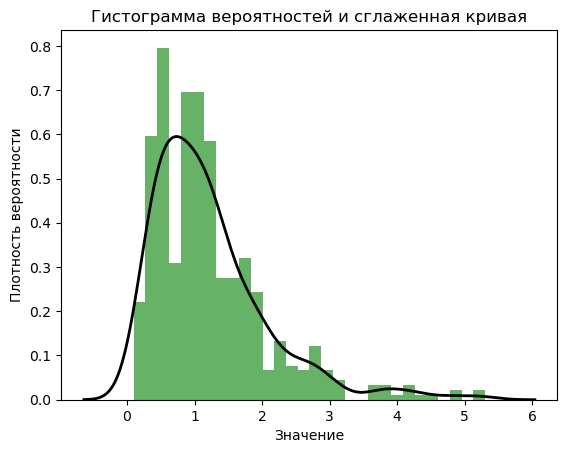

In [17]:
# Задание 6
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
data = df_trees_filt['EHt']

# Построение гистограммы вероятностей
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Сглаживание кривой
sns.kdeplot(data, color='k', linewidth=2)

plt.title("Гистограмма вероятностей и сглаженная кривая")
plt.xlabel("Значение")
plt.ylabel("Плотность вероятности")
plt.show()

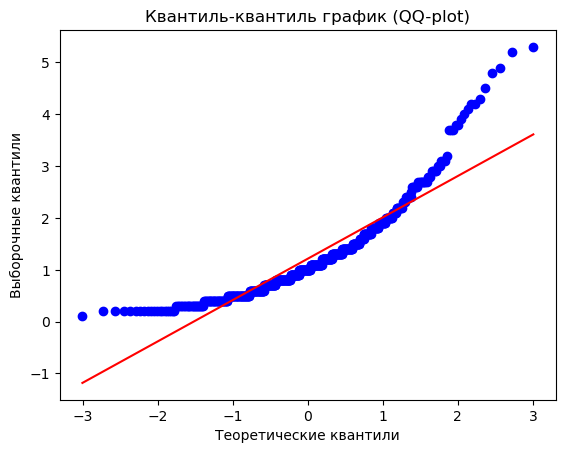

In [12]:
# Задание 7
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Пример данных
data = df_trees_filt['EHt']

# Построение QQ-plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Квантиль-квантиль график (QQ-plot)")
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.show()